In [1]:

import os

from warnings import warn

import numpy as np
import nibabel as nib
import pandas as pd
from pathlib import Path
from nilearn.interfaces.bids import save_glm_to_bids
from nilearn.glm.first_level import make_first_level_design_matrix

In [1]:
from nilearn.glm.first_level import first_level_from_bids
from bids import BIDSLayout

bids_dir = "/scratch/ttan/ScanD_pipelines_scc/data/local/bids/"
task_label = "nbk"
space_label = "fsLR"
derivatives_dir = "/scratch/ttan/ScanD_pipelines_scc/data/local/derivatives/fmriprep"
dense = '91k'
session = '01'
participant_label = 'CMHWM030'
# img_filters= [
#     # ('run','1'),
#     ('ses','01') # Need to add a condition for ses-01 and ses-02 default all
# ] 
# img_filters = []

<Axes: label='conditions', ylabel='scan number'>

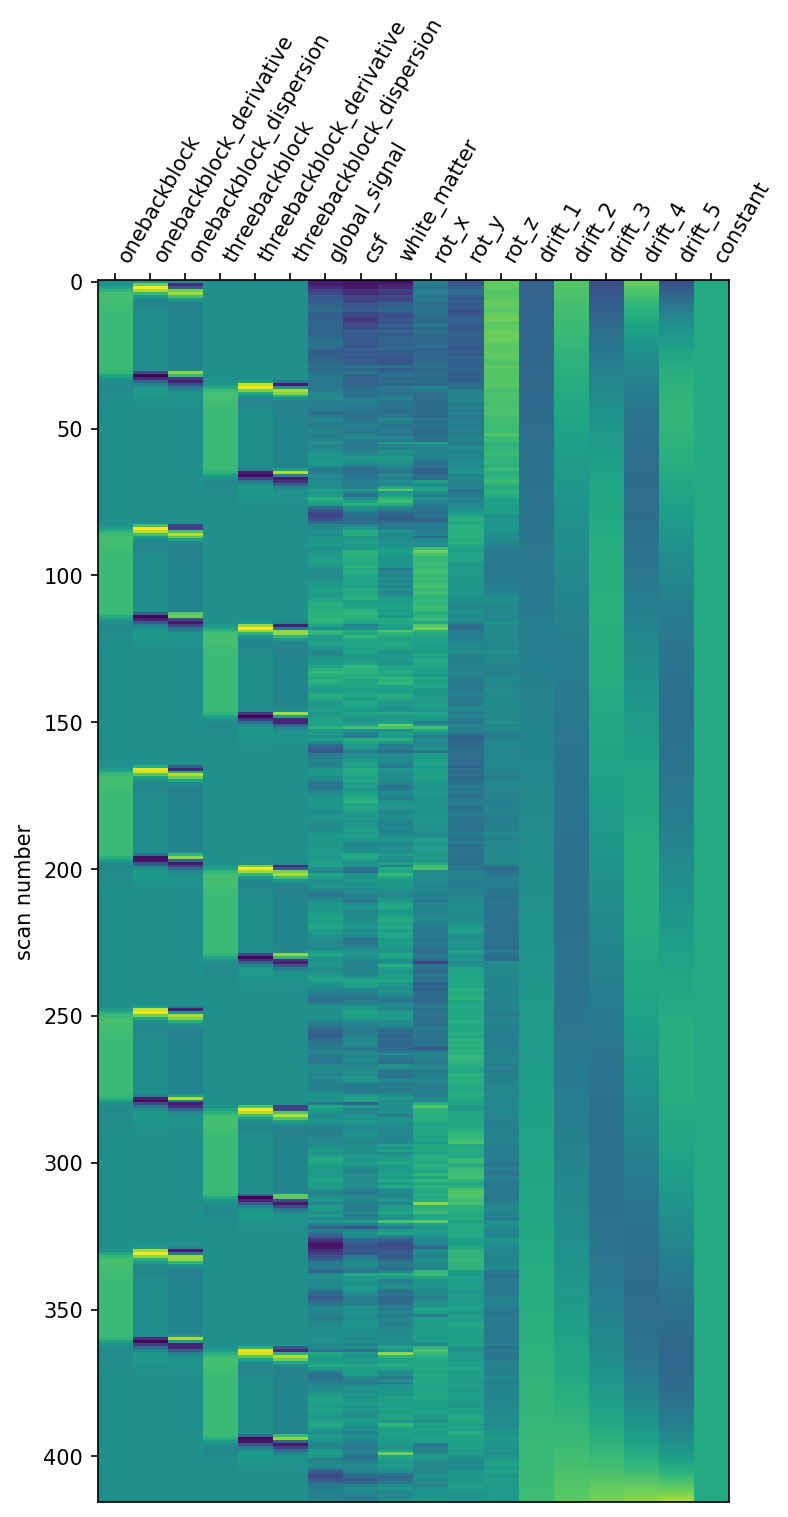

In [3]:
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt
import pandas as pd
from nilearn.plotting import plot_contrast_matrix
file = '/scratch/ttan/ScanD_pipelines_scc/bin/results/plot_bids_features/derivatives/nilearn_glm_v1/sub-CMHWM027/CMHWM027_ses-01_task-nbk_run-2_design.tsv'
dm = pd.read_csv(file, delimiter="\t")
dm_df = dm.iloc[4:].reset_index(drop=True)
# plot_contrast_matrix("threebackblock - onebackblock",design_matrix = dm_df)
plt.rcParams['figure.dpi'] = 150
plt.show()
plot_design_matrix(dm_df)

In [ ]:
from nilearn import plotting as nlp
def plot_dscalar(
    img,
    colorbar=True,
    # plot_abs=False,
    vmax=None,
    threshold=None,
    cmap='cold_hot',
    output_file=None,
):
    import matplotlib as mpl
    from matplotlib import pyplot as plt

    subcort, ltexture, rtexture = decompose_dscalar(img)
    fig = plt.figure(figsize=(11, 9))
    ax1 = plt.subplot2grid((3, 2), (0, 0), projection='3d')
    ax2 = plt.subplot2grid((3, 2), (0, 1), projection='3d')
    ax3 = plt.subplot2grid((3, 2), (1, 0), projection='3d')
    ax4 = plt.subplot2grid((3, 2), (1, 1), projection='3d')
    ax5 = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    # surf_fmt = 'data/conte69/tpl-conte69_hemi-{hemi}_space-fsLR_den-32k_inflated.surf.gii'.format
    surf_fmt = '/scratch/ttan/ScanD_pipelines_scc/bin/tpl-conte69_hemi-{hemi}_space-fsLR_den-32k_inflated.surf.gii'.format
    lsurf = nb.load(surf_fmt(hemi='L')).agg_data()
    rsurf = nb.load(surf_fmt(hemi='R')).agg_data()
    kwargs = {
        'threshold': None if threshold == 'auto' else threshold,
        'colorbar': False,
        # 'plot_abs': plot_abs,
        'cmap': cmap,
        'vmax': vmax,
    }
    nlp.plot_surf_stat_map(lsurf, ltexture, view='lateral', axes=ax1, **kwargs)
    nlp.plot_surf_stat_map(rsurf, rtexture, view='medial', axes=ax2, **kwargs)
    nlp.plot_surf_stat_map(lsurf, ltexture, view='medial', axes=ax3, **kwargs)
    nlp.plot_surf_stat_map(rsurf, rtexture, view='lateral', axes=ax4, **kwargs)
    nlp.plot_glass_brain(subcort, display_mode='lyrz', axes=ax5, **kwargs)
    if colorbar:
        data = img.get_fdata(dtype=np.float32)
        if vmax is None:
            vmax = max(-data.min(), data.max())
        norm = mpl.colors.Normalize(vmin=-vmax if data.min() < 0 else 0, vmax=vmax)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        fig.colorbar(sm, ax=fig.axes, location='right', aspect=50)
    if output_file:
        fig.savefig(output_file)
        plt.close(fig)

In [ ]:
def decompose_dscalar(img):
    data = img.get_fdata(dtype=np.float32)
    ax = img.header.get_axis(1)
    vol = np.zeros(ax.volume_shape, dtype=np.float32)
    vox_indices = tuple(ax.voxel[ax.volume_mask].T)
    vol[vox_indices] = data[:, ax.volume_mask]
    subcort = nb.Nifti1Image(vol, ax.affine)

    surfs = {}
    for name, indices, brainmodel in ax.iter_structures():
        if not name.startswith('CIFTI_STRUCTURE_CORTEX_'):
            continue
        hemi = name.split('_')[3].lower()
        texture = np.zeros(brainmodel.vertex.max() + 1, dtype=np.float32)
        texture[brainmodel.vertex] = data[:, indices]
        surfs[hemi] = texture

    return subcort, surfs['left'], surfs['right']

In [ ]:
from nipype.utils.filemanip import fname_presuffix, split_filename
import nibabel as nb
fname = '/scratch/ttan/ScanD_pipelines_scc/bin/results/plot_bids_features/derivatives/nilearn_glm_v1/sub-CMHWM027/CMHWM027_ses-02_task-nbk_run-1_contrast-threebackblockMinusOnebackblock_stat-effect_statmap.dscalar.nii'
_, _, ext = split_filename(fname)

fdata = nb.load(fname)
fdata
subcort, ltexture, rtexture = decompose_dscalar(fdata)
vmax_r = np.percentile(rtexture, 99)
vmax_l = np.percentile(ltexture,99)
vmax = (vmax_r + vmax_l) / 2
vmax

In [ ]:
from nipype.utils.filemanip import fname_presuffix, split_filename
import nibabel as nb
fname = '/scratch/ttan/ScanD_pipelines_scc/bin/results/plot_bids_features/derivatives/nilearn_glm_v1/sub-CMHWM027/CMHWM027_ses-02_task-nbk_run-1_contrast-threebackblockMinusOnebackblock_stat-effect_statmap.dscalar.nii'
_, _, ext = split_filename(fname)

fdata = nb.load(fname)
fdata
subcort, ltexture, rtexture = decompose_dscalar(fdata)
vmax_r = np.percentile(rtexture, 99)
vmax_l = np.percentile(ltexture,99)
vmax = (vmax_r + vmax_l) / 2
fig = plt.figure(figsize=(11, 9))
ax1 = plt.subplot2grid((3, 2), (0, 0), projection='3d')
ax2 = plt.subplot2grid((3, 2), (0, 1), projection='3d')
ax3 = plt.subplot2grid((3, 2), (1, 0), projection='3d')
ax4 = plt.subplot2grid((3, 2), (1, 1), projection='3d')
ax5 = plt.subplot2grid((3, 2), (2, 0), colspan=2)
surf_fmt = '/scratch/ttan/ScanD_pipelines_scc/bin/tpl-conte69_hemi-{hemi}_space-fsLR_den-32k_inflated.surf.gii'.format
lsurf = nb.load(surf_fmt(hemi='L')).agg_data()
rsurf = nb.load(surf_fmt(hemi='R')).agg_data()
# kwargs = {
#     'threshold': None if threshold == 'auto' else threshold,
#     'colorbar': False,
#     # 'plot_abs': plot_abs,
#     'cmap': cmap,
#     'vmax': vmax,
# }
nlp.plot_surf_stat_map(lsurf, ltexture, vmax=vmax, cmap='roy_big_bl', view='lateral', axes=ax1, )
nlp.plot_surf_stat_map(rsurf, rtexture, vmax=vmax, cmap='roy_big_bl', view='medial', axes=ax2, )
nlp.plot_surf_stat_map(lsurf, ltexture, vmax=vmax, cmap='roy_big_bl', view='medial', axes=ax3, )
nlp.plot_surf_stat_map(rsurf, rtexture, vmax=vmax, cmap='roy_big_bl', view='lateral', axes=ax4, )
nlp.plot_glass_brain(subcort, display_mode='lyrz', axes=ax5, )

In [ ]:
rtexture

In [ ]:
ltexture

In [ ]:
nlp.plot_surf_stat_map(lsurf, ltexture, vmax=vmax, cmap='bwr', view='lateral', axes=ax1, )
nlp.plot_surf_stat_map(rsurf, rtexture, vmax=vmax, cmap='bwr', view='medial', axes=ax2, )
nlp.plot_surf_stat_map(lsurf, ltexture, vmax=vmax, cmap='bwr', view='medial', axes=ax3, )
nlp.plot_surf_stat_map(rsurf, rtexture, vmax=vmax, cmap='bwr', view='lateral', axes=ax4, )
nlp.plot_glass_brain(subcort, display_mode='lyrz', axes=ax5, )

In [ ]:
import numpy as np
vmax = None
abs_data = np.abs(fdata.get_fdata(dtype=np.float32))
pctile99 = np.percentile(abs_data, 99.99)
if abs_data.max() - pctile99 > 10:
    vmax = pctile99
vmax

In [ ]:
vmax = np.percentile(rtexture, 99)
vmax

In [ ]:
subcort

In [ ]:
vmax = np.percentile(subcort.get_fdata(dtype=np.float32), 99)
vmax

In [ ]:
# from nipype.interfaces.base import traits
# threshold = traits.Enum('auto', None, traits.Float(), usedefault=True)
# vmax = traits.Float()
# colormap = traits.Str('bwr', usedefault=True)

In [ ]:
### Fitlins

import numpy as np
import pandas as pd
import nibabel as nb
from nilearn import plotting as nlp
from collections import namedtuple
from pkg_resources import resource_filename
from nipype.interfaces.base import (
    SimpleInterface,
    BaseInterfaceInputSpec,
    TraitedSpec,
    File,
    traits,
    isdefined,
)

from nipype.utils.filemanip import fname_presuffix, split_filename



In [ ]:
class VisualizationInputSpec(BaseInterfaceInputSpec):
    data = File(mandatory=True, desc='Data file to visualize')
    image_type = traits.Enum('svg', 'png', mandatory=True)


In [ ]:
class VisualizationOutputSpec(TraitedSpec):
    figure = File(desc='Visualization')

In [ ]:
class Visualization(SimpleInterface):
    input_spec = VisualizationInputSpec
    output_spec = VisualizationOutputSpec

    def _run_interface(self, runtime):
        import matplotlib

        matplotlib.use('Agg')
        import seaborn as sns
        from matplotlib import pyplot as plt

        sns.set_style('white')
        plt.rcParams['svg.fonttype'] = 'none'
        plt.rcParams['image.interpolation'] = 'nearest'

        data = self._load_data(self.inputs.data)
        out_name = fname_presuffix(
            self.inputs.data,
            suffix='.' + self.inputs.image_type,
            newpath=runtime.cwd,
            use_ext=False,
        )
        self._visualize(data, out_name)
        self._results['figure'] = out_name
        return runtime

    def _load_data(self, fname):
        _, _, ext = split_filename(fname)
        if ext == '.tsv':
            return pd.read_table(fname, index_col=0)
        elif ext in ('.nii', '.nii.gz', '.gii'):
            return nb.load(fname)
        raise ValueError("Unknown file type!")

In [ ]:
class GlassBrainPlotInputSpec(VisualizationInputSpec):
    threshold = traits.Enum('auto', None, traits.Float(), usedefault=True)
    vmax = traits.Float()
    colormap = traits.Str('bwr', usedefault=True)

In [ ]:
class GlassBrainPlot(Visualization):
    input_spec = GlassBrainPlotInputSpec

    def _visualize(self, data, out_name):
        import numpy as np

        vmax = self.inputs.vmax
        if not isdefined(vmax):
            vmax = None
            abs_data = np.abs(data.get_fdata(dtype=np.float32))
            pctile99 = np.percentile(abs_data, 99.99)
            if abs_data.max() - pctile99 > 10:
                vmax = pctile99
        if isinstance(data, nb.Cifti2Image):
            plot_dscalar(
                data,
                vmax=vmax,
                threshold=self.inputs.threshold,
                cmap=self.inputs.colormap,
                output_file=out_name,
            )
        else:
            nlp.plot_glass_brain(
                data,
                colorbar=True,
                plot_abs=False,
                display_mode='lyrz',
                axes=None,
                vmax=vmax,
                threshold=self.inputs.threshold,
                cmap=self.inputs.colormap,
                output_file=out_name,
            )
            
def plot_dscalar(
    img,
    colorbar=True,
    # plot_abs=False,
    vmax=None,
    threshold=None,
    cmap='roy_big_bl',
    output_file=None,
):
    import matplotlib as mpl
    from matplotlib import pyplot as plt

    subcort, ltexture, rtexture = decompose_dscalar(img)
    fig = plt.figure(figsize=(11, 9))
    ax1 = plt.subplot2grid((3, 2), (0, 0), projection='3d')
    ax2 = plt.subplot2grid((3, 2), (0, 1), projection='3d')
    ax3 = plt.subplot2grid((3, 2), (1, 0), projection='3d')
    ax4 = plt.subplot2grid((3, 2), (1, 1), projection='3d')
    ax5 = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    surf_fmt = '/projects/ttan/SCanD_project/code/glm/templates/tpl-conte69_hemi-{hemi}_space-fsLR_den-32k_inflated.surf.gii'.format
    lsurf = nb.load(surf_fmt(hemi='L')).agg_data()
    rsurf = nb.load(surf_fmt(hemi='R')).agg_data()
    kwargs = {
        'threshold': None if threshold == 'auto' else threshold,
        'colorbar': False,
        # 'plot_abs': plot_abs,
        'cmap': cmap,
        'vmax': vmax,
    }
    nlp.plot_surf_stat_map(lsurf, ltexture, view='lateral', axes=ax1, **kwargs)
    nlp.plot_surf_stat_map(rsurf, rtexture, view='medial', axes=ax2, **kwargs)
    nlp.plot_surf_stat_map(lsurf, ltexture, view='medial', axes=ax3, **kwargs)
    nlp.plot_surf_stat_map(rsurf, rtexture, view='lateral', axes=ax4, **kwargs)
    nlp.plot_glass_brain(subcort, display_mode='lyrz', axes=ax5)
    if colorbar:
        data = img.get_fdata(dtype=np.float32)
        if vmax is None:
            vmax = max(-data.min(), data.max())
        norm = mpl.colors.Normalize(vmin=-vmax if data.min() < 0 else 0, vmax=vmax)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        fig.colorbar(sm, ax=fig.axes, location='right', aspect=50)
    if output_file:
        fig.savefig(output_file)
        plt.close(fig)


def decompose_dscalar(img):
    data = img.get_fdata(dtype=np.float32)
    ax = img.header.get_axis(1)
    vol = np.zeros(ax.volume_shape, dtype=np.float32)
    vox_indices = tuple(ax.voxel[ax.volume_mask].T)
    vol[vox_indices] = data[:, ax.volume_mask]
    subcort = nb.Nifti1Image(vol, ax.affine)

    surfs = {}
    for name, indices, brainmodel in ax.iter_structures():
        if not name.startswith('CIFTI_STRUCTURE_CORTEX_'):
            continue
        hemi = name.split('_')[3].lower()
        texture = np.zeros(brainmodel.vertex.max() + 1, dtype=np.float32)
        texture[brainmodel.vertex] = data[:, indices]
        surfs[hemi] = texture

    return subcort, surfs['left'], surfs['right']

In [ ]:
dscalar_viz = GlassBrainPlot()
dscalar_viz.inputs.data = '/scratch/ttan/ScanD_pipelines_scc/bin/results/plot_bids_features/derivatives/nilearn_glm_v1/sub-CMHWM027/CMHWM027_ses-02_task-nbk_run-1_contrast-threebackblockMinusOnebackblock_stat-effect_statmap.dscalar.nii'
dscalar_viz.inputs.image_type = 'png'
dscalar_viz.inputs.vmax = 1.7428417
dscalar_viz.inputs.colormap = 'roy_big_bl'


In [ ]:
dscalar_viz.inputs

In [ ]:
%matplotlib inline

In [ ]:
dscalar_viz.run()

In [ ]:
dscalar_viz.inputs

In [ ]:
def double(x):
    return 2 * x

class DoubleInputSpec(BaseInterfaceInputSpec):
    x = traits.Float(mandatory=True)

class DoubleOutPutSpec(TraitedSpec):
    doubled = traits.Float()

class Double(SimpleInterface):
    input_spec = DoubleInputSpec
    output_spec = DoubleOutPutSpec

    def _run_interface(self, runtime):
        self._results['doubled'] = double(self.inputs.x)
        return runtime

In [ ]:
dbl = Double()
dbl.inputs.x = 2
dbl.run().outputs.doubled

In [ ]:
from nipype import DataGrabber

grabber = DataGrabber(infields=['run'])
grabber.inputs.base_directory = '/archive/data/CDIA/data/bids'
# grabber.inputs.subject_id = ['sub-CMH00000429']
grabber.inputs.template = 'sub-*/ses-*/func/*run-0%d*bold.nii.gz'
grabber.inputs.sort_filelist = True
grabber.inputs.run = [1]


In [ ]:
result = grabber.run()
print(result.outputs.outfiles)

In [ ]:
import numpy as np
from nilearn.surface import SurfaceImage
from templateflow import api as tflow
from pathlib import Path
from nilearn.surface import load_surf_data

left_surf_32k = tflow.get('fsLR',suffix='midthickness', hemi='L', density='32k', extension='surf.gii')
right_surf_32k = tflow.get('fsLR',suffix='midthickness', hemi='R', density='32k', extension='surf.gii')

try:
    templateflow_dir = Path(os.getenv("TEMPLATEFLOW_HOME"))
    print(f"TEMPLATEFLOW_HOME is set to: {templateflow_dir}")
except KeyError:
    print("TEMPLATEFLOW_HOME is not set. Please set it first.")

mesh = {
    "left": templateflow_dir / "tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii",
    "right": templateflow_dir / "tpl-fsLR_den-32k_hemi-R_midthickness.surf.gii"
    # "volume": "/home/ttan/.cache/templateflow/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_res-02_T1w.nii.gz"
}


In [ ]:
lh_data = load_surf_data((imgs[0], mesh["left"]))

In [ ]:
!pip install fitlins  

In [ ]:
from fitlins.interfaces import visualizations

dscalar_file = '/scratch/ttan/ScanD_pipelines_scc/bin/results/plot_bids_features/derivatives/nilearn_glm_v1/sub-CMHWM027/CMHWM027_ses-02_task-nbk_run-1_contrast-threebackblockMinusOnebackblock_stat-effect_statmap.dscalar.nii'

# visualizations.Visualization()
# glass_brain = visualizations.GlassBrainPlot(image_type='png', data=dscalar_file)

In [ ]:
os.path.exists('/home/ttan/.cache/templateflow/tpl-fsLR/tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii')

In [ ]:
# model.fit(imgs[0], design_matrices=dm)

In [ ]:
import pandas as pd
pd.set_option('display.max_row',550)
events_df_final

In [ ]:
layout = BIDSLayout(derivatives_dir,is_derivative=True,validate=False)

In [ ]:
# layout.add_derivatives(derivatives_dir)

In [ ]:
# layout

In [ ]:
sub029_files = layout.get(subject='CMHWM027',task='nbk',run='1',space='fsLR')

In [ ]:
sub029_files[0].get_entities()